In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
#load dataset
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
x = iris.data
y = iris.target

df = pd.DataFrame(x, columns=iris.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
new_df = df.copy()

In [11]:
new_df['class'] = y

In [13]:
new_df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
class                 3
dtype: int64

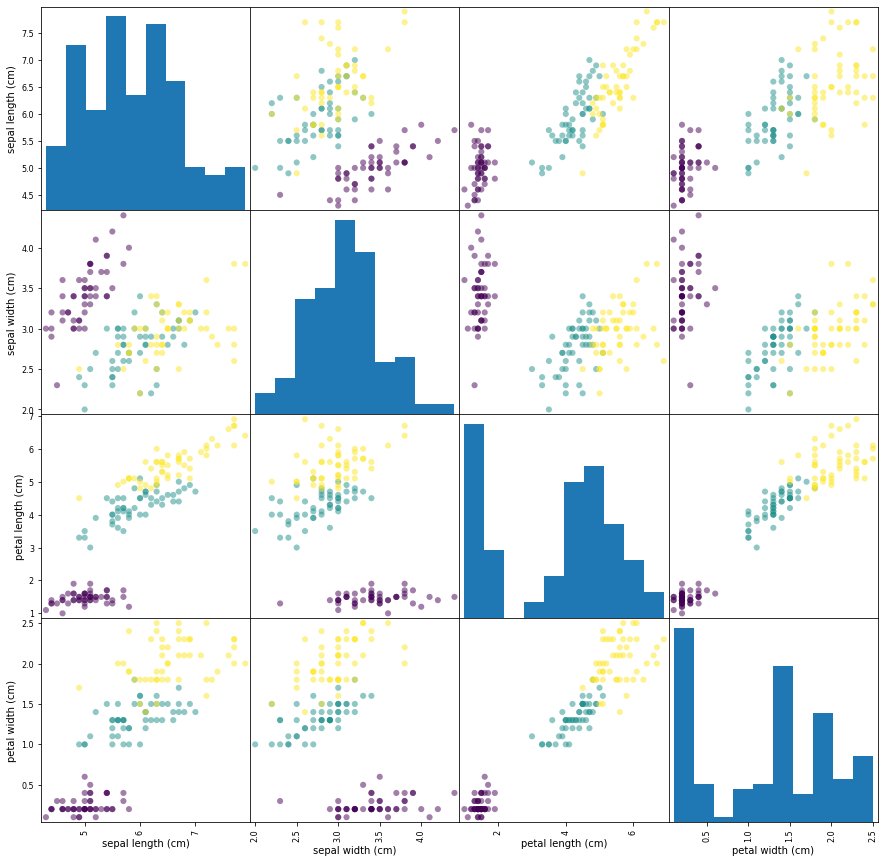

In [16]:
matrix_scatter = pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), s=150)

In [18]:
X = new_df.drop('class',axis=1)
y = new_df['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=34,stratify=y)

In [27]:
dt = DecisionTreeClassifier(max_depth=2,random_state=34)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=34)

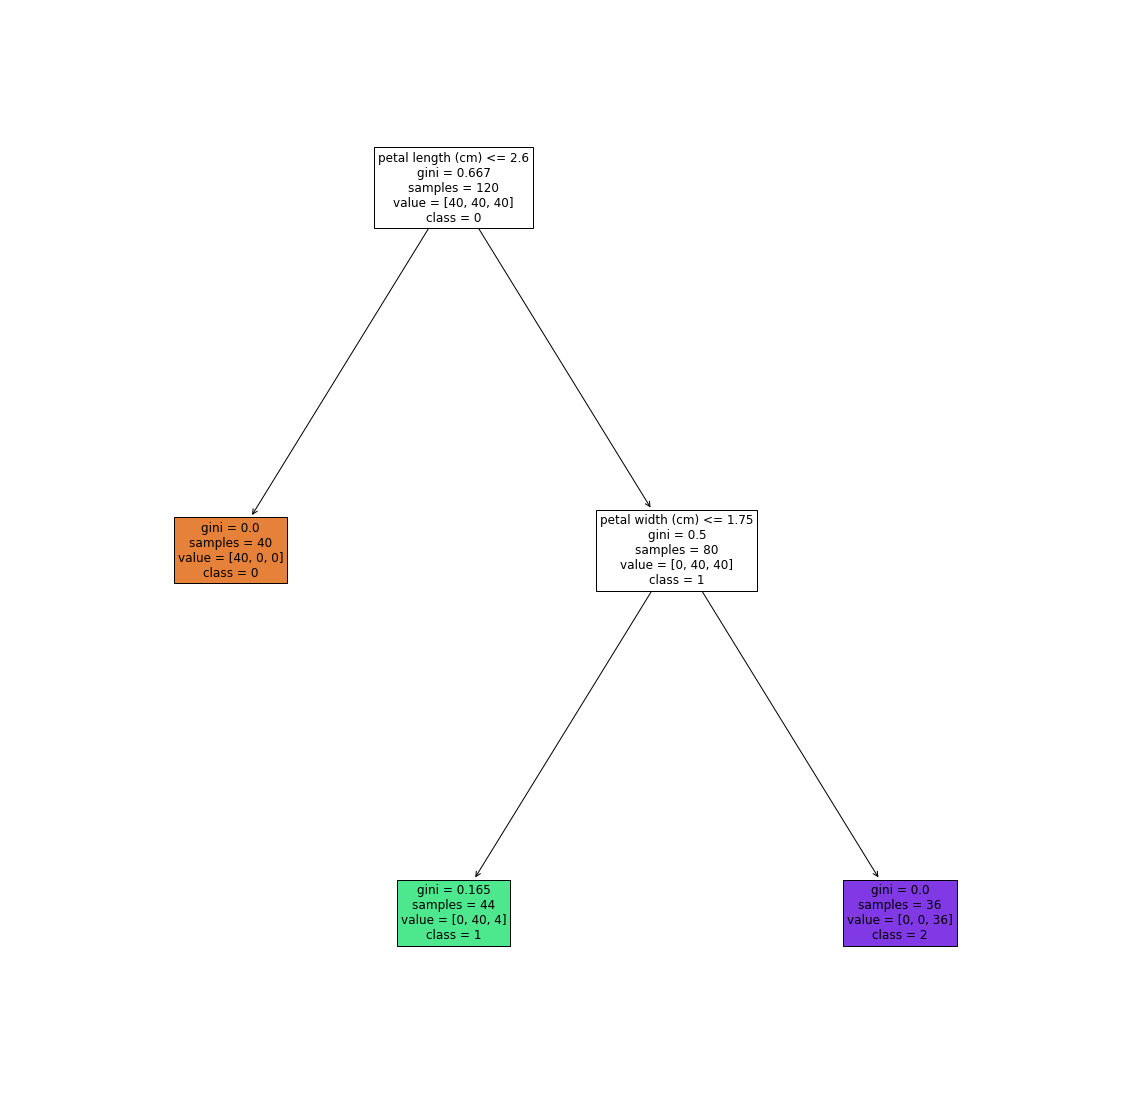

In [28]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt, feature_names=X.columns, class_names=['0','1','2'], filled=True, fontsize=12)
plt.show()

In [30]:
y_train_pred = dt.predict(X_train)

In [32]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.91      1.00      0.95        40
           2       1.00      0.90      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [37]:
cm = confusion_matrix(y_train, y_train_pred)
print('DT\n',cm)

DT
 [[40  0  0]
 [ 0 40  0]
 [ 0  4 36]]


In [31]:
y_test_pred = dt.predict(X_test)

In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [38]:
cm = confusion_matrix(y_test, y_test_pred)
print('DT\n',cm)

DT
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [39]:
print('Train',dt.score(X_train,y_train))
print('Test',dt.score(X_test,y_test))

Train 0.9666666666666667
Test 0.9333333333333333


# Hyperparameter Tuning

In [47]:
params = {
    'criterion': ['gini','entropy'],
    'max_depth': np.arange(2,9),
    'min_samples_leaf': np.arange(1,5),
    'min_samples_split': np.arange(2,6)
}

In [48]:
dt_grid = GridSearchCV(dt,params,cv=10,scoring='accuracy',return_train_score=True)

In [49]:
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=34),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5])},
             return_train_score=True, scoring='accuracy')

In [50]:
print('Best Params:',dt_grid.best_params_)

Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [51]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=34)


In [52]:
dt_train_p = dt_best.predict(X_train)
dt_val_p = dt_best.predict(X_test)

In [55]:
print('Train',classification_report(y_train,dt_train_p))
print('Test',classification_report(y_test,dt_val_p))

Train               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        40
           2       0.95      0.97      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

Test               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [56]:
new_data = [[5.1, 3.6, 1.4, 0.3]]
new_pred = dt_best.predict(new_data)

if new_pred==0:
    print('Iris-Setosa')
elif new_pred==1:
    print('Iris-Versicolor')
else:
    print('Iris-Virginica')

Iris-Setosa


C:\Users\Judan Syamsul Hadad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [59]:
act_pred = pd.DataFrame({
    'Actual':y_test,
    'Pred':dt_val_p
})

act_pred['dif'] = abs(act_pred['Actual']-act_pred['Pred'])
act_pred

,Actual,Pred,dif
141,2,2,0
76,1,1,0
137,2,2,0
81,1,1,0
29,0,0,0
134,2,2,0
97,1,1,0
11,0,0,0
35,0,0,0
144,2,2,0
